In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
from helper import *

In [3]:
from sklearn.decomposition import PCA

In [4]:
load = np.load("mnist.npz").items()
_X = load[0][1]
_Y = load[1][1]

In [5]:
data = _X[(_Y == 0) | (_Y == 1) ]

In [6]:
describe(data)

(14780, 784) 0.0 0.12147417153600294 1.0


In [7]:
inptDim = 5

In [8]:
pca = PCA(inptDim)

In [9]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, IntSlider

In [11]:
def f(a,b,c,d,e):
    plt.imshow(pca.inverse_transform([a,b,c,d,e]).reshape((28,28)))
    plt.show()

In [ ]:
x=interact(f, a=FloatSlider(min=-10, max=10, step=0.1, continuous_update=True),
             b=FloatSlider(min=-10, max=10, step=0.1, continuous_update=True),
             c=FloatSlider(min=-10, max=10, step=0.1, continuous_update=True),
             d=FloatSlider(min=-10, max=10, step=0.1, continuous_update=True),
             e=FloatSlider(min=-10, max=10, step=0.1, continuous_update=True))

In [15]:
interact(f, a=(-10,10,0.1),
            b=(-10,10,0.1),
            c=(-10,10,0.1),
            d=(-10,10,0.1),
            e=(-10,10,0.1));

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

<function __main__.f(a, b, c, d, e)>

In [37]:
init = tf.initializers.random_uniform(-0.01,0.01)

In [38]:
tf.reset_default_graph()

In [39]:
def discriminator(inpt, reuse, name):
    with tf.variable_scope("Discriminator", reuse=reuse):
# #         dl1 = tf.layers.dense(inpt, 784, activation=tf.nn.relu, name="dl1", kernel_initializer=init)
# #         dl1 = tf.layers.conv2d(inpt, 30, 5, activation=tf.nn.relu, name="dl1", kernel_initializer=init)
# #         dl2 = tf.layers.max_pooling2d(dl1, 2, 2, name="dl2")
        
# #         dl3 = tf.layers.dropout(dl2, name="dl3")
        
# #         dl4 = tf.layers.conv2d(dl3, 20, 5, activation=tf.nn.relu, name="dl4", kernel_initializer=init)
# #         dl5p= tf.layers.max_pooling2d(dl4, 2, 2, name="dl5p")
# #         dl5f= tf.layers.flatten(dl5p)
        
#         dl6 = tf.layers.dense(inpt, 200, activation=tf.nn.relu, name="dl6", kernel_initializer=init)
#         dl6d= tf.layers.dropout(dl6, name="dl6d")
#         dl7 = tf.layers.dense(dl6d, 100, activation=tf.nn.relu, name="dl7", kernel_initializer=init)
#         dl8 = tf.layers.dense( dl7, 10, activation=tf.nn.relu, name="dl8", kernel_initializer=init)
#         dis = tf.layers.dense( dl8, 1, name="dis")
#         prob= tf.sigmoid(dis, name)
        dl1 = tf.layers.conv2d(inpt, 30, 5, activation=tf.nn.relu, name="dl1", kernel_initializer=init)
        dl2 = tf.layers.max_pooling2d(dl1, 2, 2, name="dl2")
        
        dl3 = tf.layers.dropout(dl2, name="dl3")
        
        dl4 = tf.layers.conv2d(dl3, 20, 5, activation=tf.nn.relu, name="dl4", kernel_initializer=init)
        dl5p= tf.layers.max_pooling2d(dl4, 2, 2, name="dl5p")
        dl5f= tf.layers.flatten(dl5p)
        
        dl6 = tf.layers.dense(dl5f, 200, activation=tf.nn.relu, name="dl6", kernel_initializer=init)
        dl7 = tf.layers.dense( dl6, 100, activation=tf.nn.relu, name="dl7", kernel_initializer=init)
        dl8 = tf.layers.dense( dl7, 10, activation=tf.nn.relu, name="dl8", kernel_initializer=init)
        dis = tf.layers.dense( dl8, 1, name="dis")
        prob= tf.sigmoid(dis, name)

    return prob

In [40]:
noiseDim = 100
# inX = tf.placeholder(tf.float32, shape=[None, inptDim], name="X")
inX = tf.placeholder(tf.float32, shape=[None, 28, 28, 1], name="X")
z  = tf.placeholder(tf.float32, shape=[None, noiseDim], name="z")

In [41]:
dis = discriminator(inX, False, "discriminator")

In [42]:
with tf.variable_scope("Generator"):

#     gl1 = tf.layers.dense(z,   100, activation=tf.nn.leaky_relu, name="gl1", kernel_initializer=init)
#     gl2 = tf.layers.dense(gl1, 120, activation=tf.nn.leaky_relu, name="gl2", kernel_initializer=init)
#     gl3 = tf.layers.dense(gl2, 150, activation=tf.nn.leaky_relu, name="gl3", kernel_initializer=init)
#     gen = tf.layers.dense(gl3, inptDim, activation=tf.nn.leaky_relu, name="gen", kernel_initializer=init)
    
    gl1 = tf.layers.dense(z,   1000, activation=tf.nn.leaky_relu, name="gl1", kernel_initializer=init)
    gl2 = tf.layers.dense(gl1, 800, activation=tf.nn.leaky_relu, name="gl2", kernel_initializer=init)
    gl3 = tf.layers.dense(gl2, 784, activation=tf.nn.leaky_relu, name="gl3", kernel_initializer=init)
    gl4 = tf.layers.dense(gl3, 784, activation=tf.nn.sigmoid, name="gl4", kernel_initializer=init)
    gen = tf.reshape(gl4, (-1, 28, 28, 1), name="gen")
#     gen = tf.reshape(gl4, (-1, 28, 28, 1), name="gen")
#     gen = tf.layers.dense(gl4, 2, name="gen")

combined = discriminator(gen, True, "combined")

In [43]:
gen_vars  = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="Discriminator")

In [44]:
gloss = tf.reduce_mean(tf.log(1 - combined))

In [45]:
dloss = - tf.reduce_mean(tf.log(dis) + tf.log(1 - combined))

In [46]:
writer = tf.summary.FileWriter('log/')
writer.add_graph(tf.get_default_graph())
writer.close()

In [47]:
train_gen = tf.train.AdamOptimizer(3e-3).minimize(gloss, var_list=gen_vars)
train_dis = tf.train.AdamOptimizer(3e-3).minimize(dloss, var_list=disc_vars)

In [48]:
def noiseGenerator(batch_size, mean_rng=[-100, 100]):
    while True:
        mask = np.random.randint(0, 2, (batch_size, 1))
        yield np.random.multivariate_normal(np.zeros(noiseDim), np.identity(noiseDim), batch_size) * mask + \
        np.random.multivariate_normal(4 * np.ones(noiseDim), np.identity(noiseDim), batch_size) * (1 - mask)

In [49]:
# noiseDim = 2
# x = noiseGenerator(1000)

In [50]:
# a = next(x)
# plt.scatter(a[:,0], a[:,1])

In [51]:
if "sess" in dir():
    sess.close()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [52]:
def plot():
    clear_output(wait=True)
    fig = plt.figure(figsize=(15,20))

    plt.subplot(211)
    plt.title("Loss")
    plt.plot(-glh, label="generator loss")
    plt.plot( dlh, label="discriminator loss")
    plt.legend()


#     plt.title("Generated numbers")
#     plt.grid(None)
#     for i in range(5):
#         plt.figure(figsize=(5,5))
# #         plt.subplot(10*2, 10, 100 + i)
#         plt.imshow(generated[i].reshape((28, 28)))


#     genT = pca.inverse_transform(generated[:2])
    
    genT = (generated)

    plt.subplot(223)
    plt.imshow(genT[0].reshape((28, 28)))
    plt.subplot(224)
    plt.imshow(genT[1].reshape((28, 28)))
        
    plt.show()

In [53]:
def info():
    print("gen:", -gen_train_err)
    print("dis:", dis_train_err)
    print("epoch:", len(glosshist))
    print("distance:", dist)
    print("has nan:", np.any(np.isnan(generated)))

In [54]:
maxIter = 100000
eps = 0
batch_size = 20
k = 5

In [55]:
# trainData = pca.transform(data)
trainData = data.reshape(-1,28,28,1)

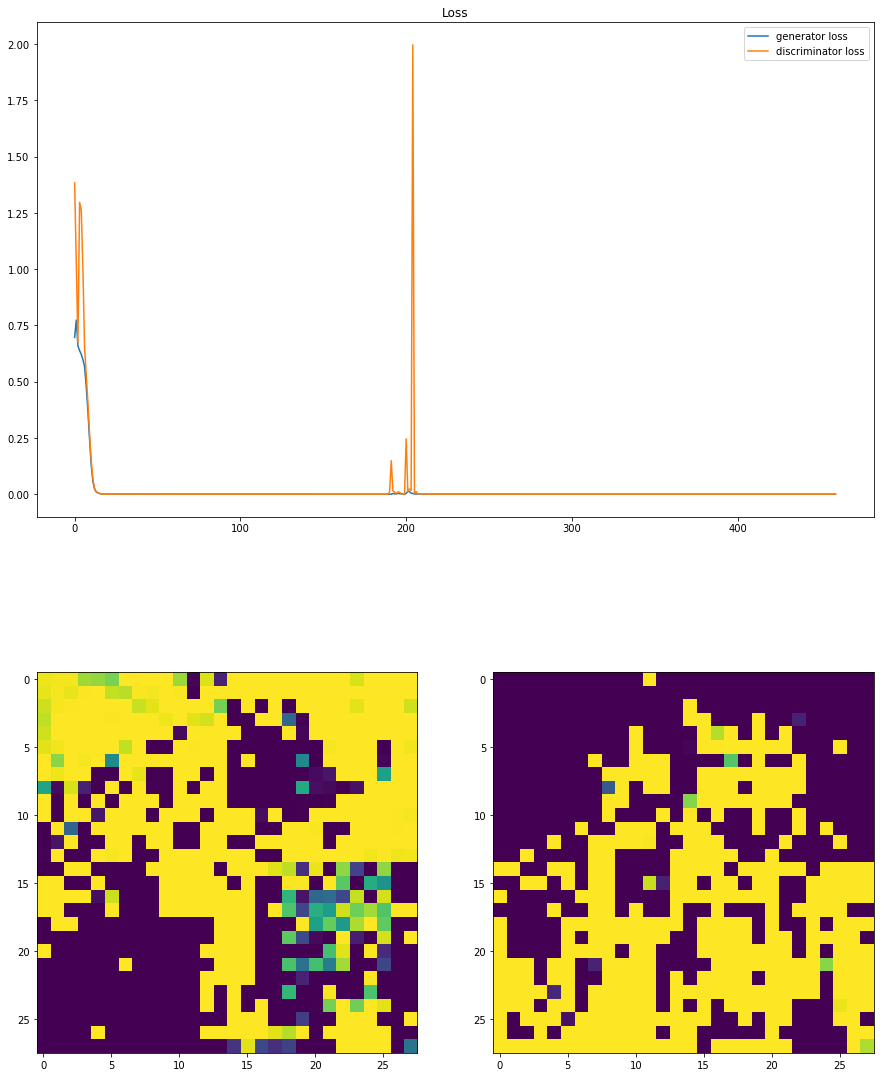

gen: -0.0
dis: -0.0
epoch: 460
distance: 0.0
has nan: False


In [56]:
glosshist=[]
dlosshist=[]

noise1 = noiseGenerator(batch_size, [-10, 10])
noise2 = noiseGenerator(2, [-12, 12])

dist = 100
while  dist > eps:
    X = trainData[np.random.choice(len(trainData), batch_size)]

    for i in range(k):
        _, dis_train_err = sess.run([train_dis, dloss], feed_dict={inX: X, z: next(noise1)})
#     print("dis trained")
    _, gen_train_err = sess.run([train_gen, gloss], feed_dict={inX: X, z: next(noise1)})

    glosshist.append(gen_train_err)
    dlosshist.append(dis_train_err)

    if len(glosshist)%20 == 0:
#         out = sess.run(dis, feed_dict={inX: l2})
        generated = sess.run(gen, feed_dict={z: next(noise2)})
        
        dist = np.abs(glosshist[-1]-glosshist[-2]) + np.abs(dlosshist[-1]-dlosshist[-2])
        
        glh = np.array(glosshist[-500:])
        dlh = np.array(dlosshist[-500:])
        plot()
        info()
    
    if len(glosshist) >= maxIter:
        break

In [57]:
describe(trainData)

(14780, 28, 28, 1) 0.0 0.12147417153600294 1.0


In [31]:
describe(generated)

(2, 28, 28, 1) nan nan nan


In [32]:
# allDone()

In [33]:
# glosshist, dlosshist

In [34]:
noise3 = noiseGenerator(100)

In [35]:
# genT = pca.inverse_transform(sess.run(gen, feed_dict={z: next(noise3)}))
genT = sess.run(gen, feed_dict={z: next(noise3)})

C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\colors.py:916: UserWarning: Warning: converting a ma

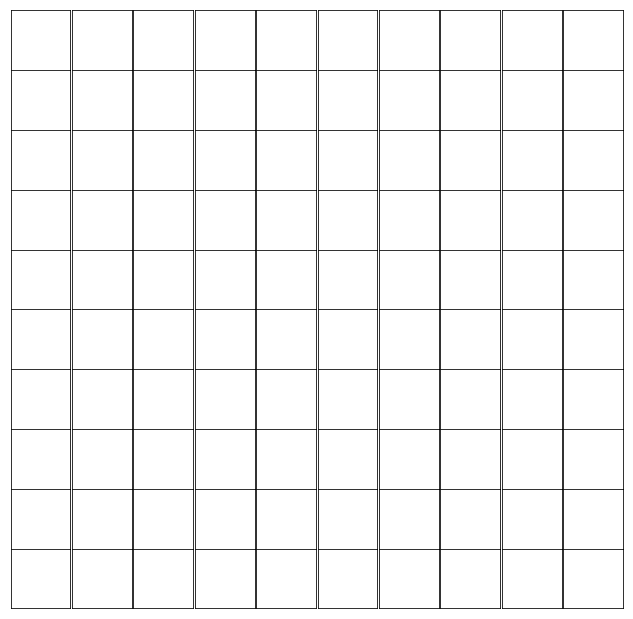

In [36]:
fig, ax = plt.subplots(10, 10, figsize=(11, 11))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(10):
    for j in range(10):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(genT[i*10 + j].reshape((28, 28)), cmap="gray")